# Data Pre-Processing

In [273]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder

# Loading Dataset

In [274]:
df = pd.read_csv('C:\\Users\\nextn\\Downloads\\Office Prediction\\maindataset.csv')

In [275]:
df.head()

,Current Working platform?,Working hrs/week,Effective working hours,Completed projects,Experience,QA,DevOps,PM,Problem-solving,security technical,version control,UI/UX design,prefer working in team or solo,Does your team provide you support at work whenever needed?,provide resources and tools,clear work objectives,constructive feedback,training in hybrid work.,Preferred working platform
0,hybrid,41,6,7,Intermediate,Yes,No,Yes,yes,No,yes,no,based on task,yes,always,daily,only during evaluation,yes,hybrid
1,hybrid,41,5,7,Intermediate,Yes,No,Yes,no,No,no,yes,both,sometimes,never,weekly,sometimes,No,hybrid
2,hybrid,40,7,3,Beginner,No,No,No,yes,No,yes,no,solo,sometimes,always,projectwise,sometimes,No,hybrid
3,office,40,6,9,Beginner,No,No,No,no,No,no,no,solo,yes,never,projectwise,only during evaluation,No,online platform
4,remote,40,6,9,Beginner,No,No,No,no,No,no,yes,both,yes,always,weekly,only during evaluation,No,official platform


In [276]:
df.keys()

Index(['Current Working platform?', 'Working  hrs/week',
       'Effective working hours', 'Completed projects', 'Experience', 'QA',
       ' DevOps ', 'PM', ' Problem-solving ', 'security technical',
       'version control', 'UI/UX design', 'prefer working in team or solo',
       'Does your team provide you support at work whenever needed?',
       'provide resources and tools', 'clear work objectives ',
       'constructive feedback', 'training in hybrid work.',
       'Preferred working platform'],
      dtype='object')

In [277]:
df['Experience'].unique()

array(['Intermediate', 'Beginner ', 'expert'], dtype=object)

In [278]:
df['Experience'] = df['Experience'].replace('Beginner ', 'Beginner')

In [279]:
df['Experience'] = df['Experience'].replace('expert', 'Expert')

In [280]:
df = df.rename(columns={' Problem-solving ': 'Problem-Solving', 'security technical': 'Security Technical', 'version control': 'Version Control', 'UI/UX design': 'UI/UX Design'})

In [281]:
df['Problem-Solving'].unique()

array(['yes', 'no', 'Yes'], dtype=object)

In [282]:
df['Version Control'].unique()

array(['yes', 'no', 'Yes'], dtype=object)

In [283]:
df['UI/UX Design'].unique()

array(['no', 'yes', 'Yes'], dtype=object)

In [284]:
mapping = {'Yes': 'yes'}

In [285]:
df['Problem-Solving'] = df['Problem-Solving'].replace(mapping)
df['Version Control'] = df['Version Control'].replace(mapping)
df['UI/UX Design'] = df['UI/UX Design'].replace(mapping)

In [286]:
columns = ['Problem-Solving', 'Security Technical', 'Version Control', 'UI/UX Design']

In [287]:
df['Skills'] = ''

In [288]:
for index, row in df.iterrows():

    for column in columns:
        if row[column].lower() == 'yes':

            if pd.isnull(df.at[index, 'Skills']):
                df.at[index, 'Skills'] = column
            else:
                df.at[index, 'Skills'] += ' ' + column

In [289]:
df['Skills'] = df['Skills'].str.rstrip(', ')
df['Skills'] = df['Skills'].str.lstrip(', ')

In [290]:
df.replace({'': 'N/A', ' ': 'N/A'}, inplace=True)

In [291]:
print(df['Experience'].value_counts())
print()

Experience
Beginner        471
Intermediate    340
Expert          198
Name: count, dtype: int64



In [292]:
print(df['Skills'].value_counts())
print()

Skills
Problem-Solving Version Control UI/UX Design                       218
Problem-Solving Version Control                                    214
UI/UX Design                                                       196
N/A                                                                183
Security Technical                                                  55
Security Technical UI/UX Design                                     53
Problem-Solving Security Technical Version Control                  46
Problem-Solving Security Technical Version Control UI/UX Design     44
Name: count, dtype: int64



In [293]:
print(df['Preferred working platform'].value_counts())
print()

Preferred working platform
official platform    373
online platform      320
hybrid               316
Name: count, dtype: int64



In [294]:
coln = ['Experience', 'Skills', 'Preferred working platform']

In [295]:
df = df[coln]

In [296]:
df.head()

,Experience,Skills,Preferred working platform
0,Intermediate,Problem-Solving Version Control,hybrid
1,Intermediate,UI/UX Design,hybrid
2,Beginner,Problem-Solving Version Control,hybrid
3,Beginner,N/A,online platform
4,Beginner,UI/UX Design,official platform


In [297]:
df.dtypes

Experience                    object
Skills                        object
Preferred working platform    object
dtype: object

# Exploratory Data Analysis

<Axes: xlabel='Experience'>

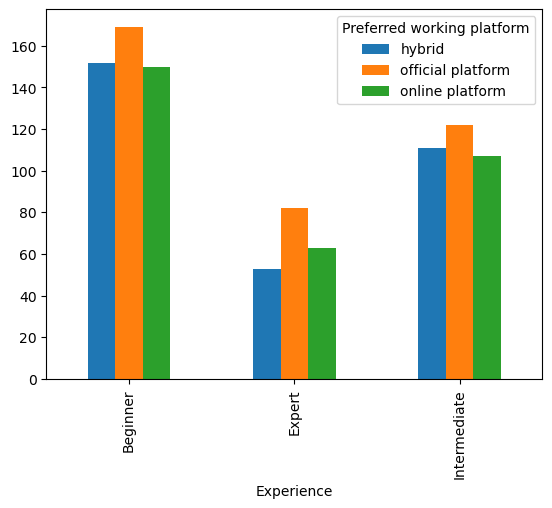

In [298]:
df.groupby(['Experience', 'Preferred working platform']).size().unstack().plot(kind='bar')

<Axes: xlabel='Skills'>

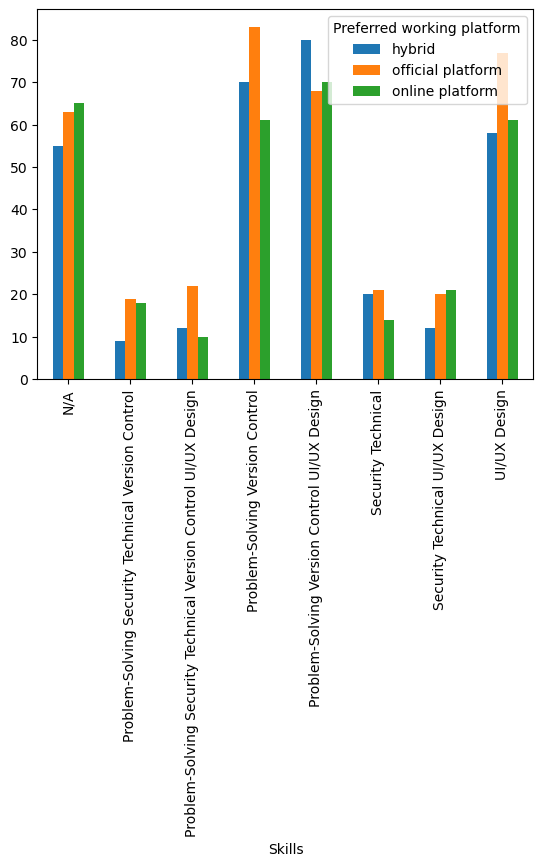

In [299]:
df.groupby(['Skills', 'Preferred working platform']).size().unstack().plot(kind='bar')

# Tokenization and Label Encoding

In [300]:
'''def custom_tokenizer(x):
    return x.split(', ')'''

"def custom_tokenizer(x):\n    return x.split(', ')"

In [301]:
vectorizer = CountVectorizer(tokenizer=str.split)
#vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
X_skills = vectorizer.fit_transform(df['Skills']).toarray()

C:\Users\nextn\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [302]:
le_experience = LabelEncoder()
le_platform = LabelEncoder()
X_experience = le_experience.fit_transform(df['Experience'])
y_platform = le_platform.fit_transform(df['Preferred working platform'])

# Data Split

In [303]:
import numpy as np
from sklearn.model_selection import train_test_split

In [304]:
X = np.hstack((X_skills, X_experience.reshape(-1, 1)))

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y_platform, test_size=0.15, random_state=50)

# Random Forest Model

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=50)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

# Evaluation

In [308]:
from sklearn.metrics import accuracy_score

In [309]:
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3355263157894737


# Prediction

In [310]:
def predict_platform(experience, skills):
    experience_encoded = le_experience.transform([experience])
    skills_tokenized = vectorizer.transform([skills]).toarray()
    user_features = np.hstack((skills_tokenized, experience_encoded.reshape(1, -1)))
    predicted_platform = rf_clf.predict(user_features)
    return le_platform.inverse_transform(predicted_platform)[0]

# Example

In [311]:
user_experience = 'Intermediate'
user_skills = 'UI/UX design'
predicted_platform = predict_platform(user_experience, user_skills)
print("Predicted platform:", predicted_platform)

Predicted platform: official platform


# Saving the Model

In [312]:
import joblib

In [313]:
joblib.dump(vectorizer, 'C:\\Users\\nextn\\Downloads\\Office Prediction\\skills.joblib')

['C:\\Users\\nextn\\Downloads\\Paid Work\\skills.joblib']

In [314]:
joblib.dump(le_experience, 'C:\\Users\\nextn\\Downloads\\Office Prediction\\experience.joblib')

['C:\\Users\\nextn\\Downloads\\Paid Work\\experience.joblib']

In [315]:
joblib.dump(le_platform, 'C:\\Users\\nextn\\Downloads\\Office Prediction\\platform.joblib')

['C:\\Users\\nextn\\Downloads\\Paid Work\\platform.joblib']

In [316]:
joblib.dump(rf_clf, 'C:\\Users\\nextn\\Downloads\\Office Prediction\\tokenization.joblib')

['C:\\Users\\nextn\\Downloads\\Paid Work\\tokenization.joblib']